In [18]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [19]:
data = pd.read_excel('sample_data.xlsx')

In [20]:
data.head(5)

,Date/Time,target,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,2022-02-01 00:00:00,0.15,876.93,340.78,2542.04,28.46,124.06,117.76,124.44,115.11,...,68.47,62.67,68.07,-30.14,104.97,28.68,1705.63,23.10,68.94,2.98
1,2022-02-01 00:01:00,0.15,877.89,340.58,2544.63,28.45,124.06,117.76,124.44,115.12,...,67.63,61.85,68.07,-30.14,104.97,28.68,1709.23,23.10,68.94,2.98
2,2022-02-01 00:02:00,0.15,878.10,338.40,2551.65,28.45,124.05,117.74,124.46,115.12,...,68.48,62.42,68.07,-30.10,104.97,28.68,1697.20,23.10,68.94,2.98
3,2022-02-01 00:03:00,0.15,878.10,342.37,2542.94,28.44,124.06,117.76,124.46,115.12,...,68.05,62.65,68.07,-30.14,104.97,28.67,1679.48,23.10,68.94,2.98
4,2022-02-01 00:04:00,0.15,878.36,337.55,2555.68,28.44,124.06,117.79,124.44,115.14,...,67.67,61.66,68.07,-30.14,104.97,28.67,1688.45,23.10,68.94,2.98


For simplification, I am going to rename the columns name from 1 to 35 to sensor1 to sensor35.

In [21]:


for col in data.columns:
    if col == 'Date/Time' or col == 'target':
        continue
    else:
        temp = 'sensor' + str(col)
        data = data.rename(columns={col:temp})

In [22]:
data.columns

Index(['Date/Time', 'target', 'sensor1', 'sensor2', 'sensor3', 'sensor4',
       'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16',
       'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22',
       'sensor23', 'sensor24', 'sensor25', 'sensor26', 'sensor27', 'sensor28',
       'sensor29', 'sensor30', 'sensor31', 'sensor32', 'sensor33', 'sensor34',
       'sensor35'],
      dtype='object')

In [23]:
statistics = data.describe()

print(statistics)


       target  sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  \
count 1440.00  1440.00  1440.00  1440.00  1440.00  1440.00  1440.00  1440.00   
mean     0.14   876.36   340.03  2550.02    28.48   124.29   117.86   124.50   
std      0.01     1.08     3.25     5.83     0.06     0.27     0.08     0.11   
min      0.10   873.18   330.16  2525.86    28.26   123.54   117.70   124.26   
25%      0.13   875.61   337.65  2546.21    28.44   124.13   117.80   124.41   
50%      0.13   876.33   340.23  2549.99    28.48   124.31   117.87   124.49   
75%      0.14   877.11   342.31  2554.05    28.53   124.45   117.92   124.59   
max      0.16   880.00   400.32  2570.37    28.64   125.21   118.24   124.85   

       sensor8  sensor9  ...  sensor26  sensor27  sensor28  sensor29  \
count  1440.00  1440.00  ...   1440.00   1440.00   1440.00   1440.00   
mean    115.19   108.37  ...     68.07     62.20     68.07    -30.35   
std       0.08     0.27  ...      0.36      0.42      0.00     

In [24]:
statistics['target']['mean']


0.13549159136602024

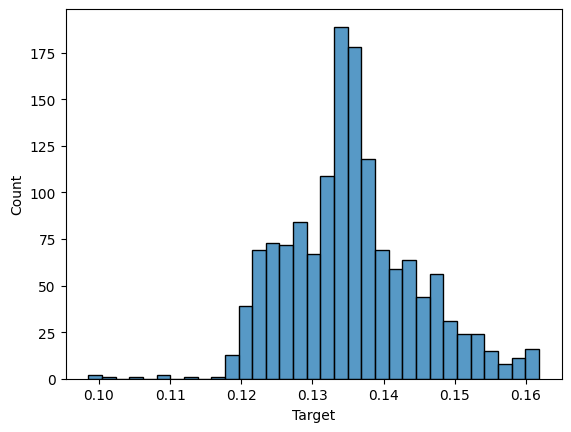

In [25]:
ax = sns.histplot(data=data, x='target', kde=False)
ax.set_xlabel('Target')
ax.set_ylabel('Count')

plt.show()


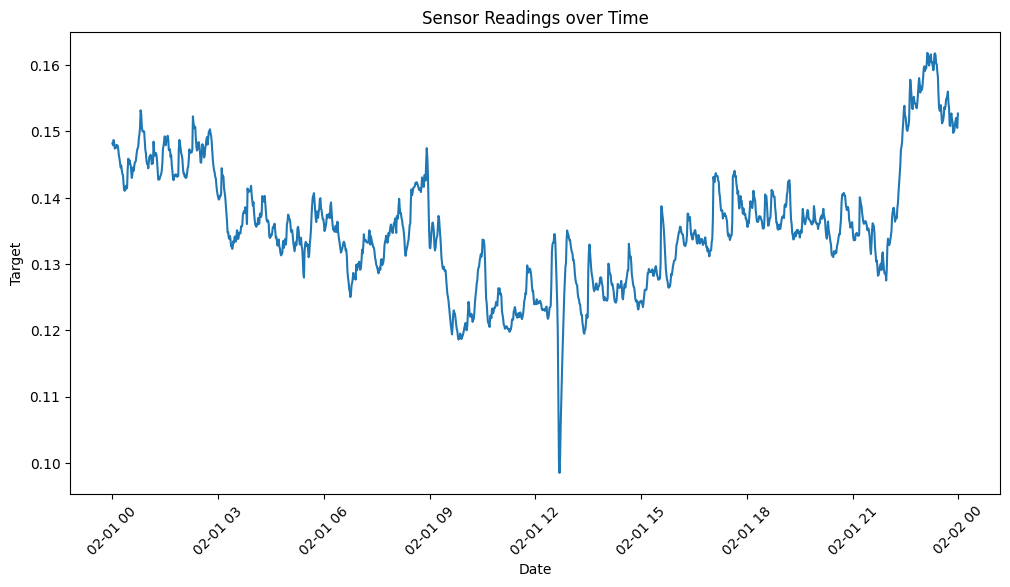

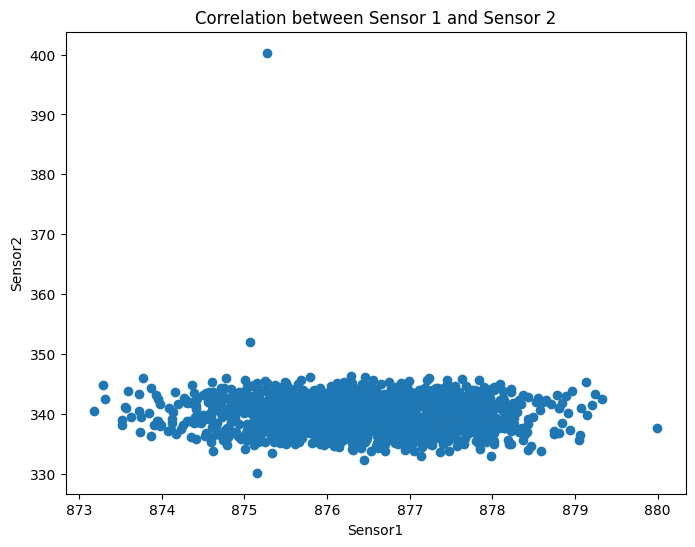

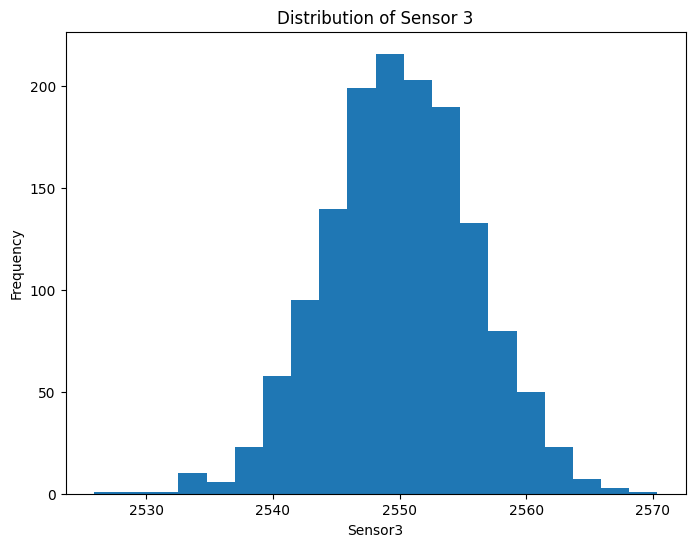

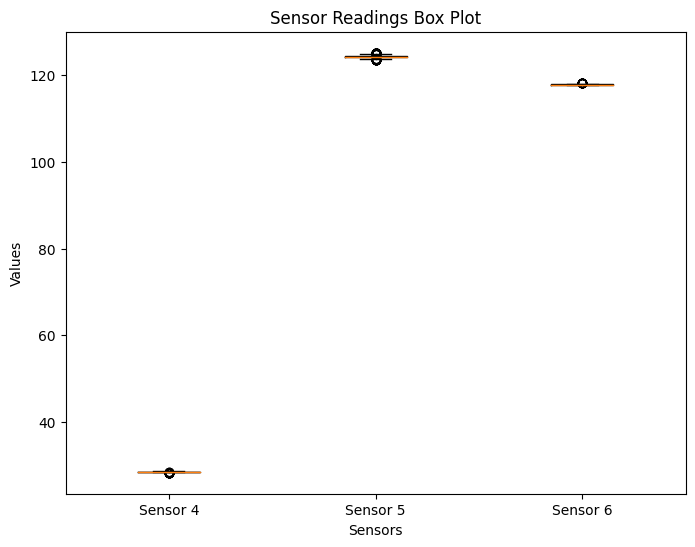

In [26]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'data'

# Line plot of sensor readings over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['target'])
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Sensor Readings over Time')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to explore correlations between sensors
plt.figure(figsize=(8, 6))
plt.scatter(data['sensor1'], data['sensor2'])
plt.xlabel('Sensor1')
plt.ylabel('Sensor2')
plt.title('Correlation between Sensor 1 and Sensor 2')
plt.show()

# Histogram of a sensor reading
plt.figure(figsize=(8, 6))
plt.hist(data['sensor3'], bins=20)
plt.xlabel('Sensor3')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor 3')
plt.show()



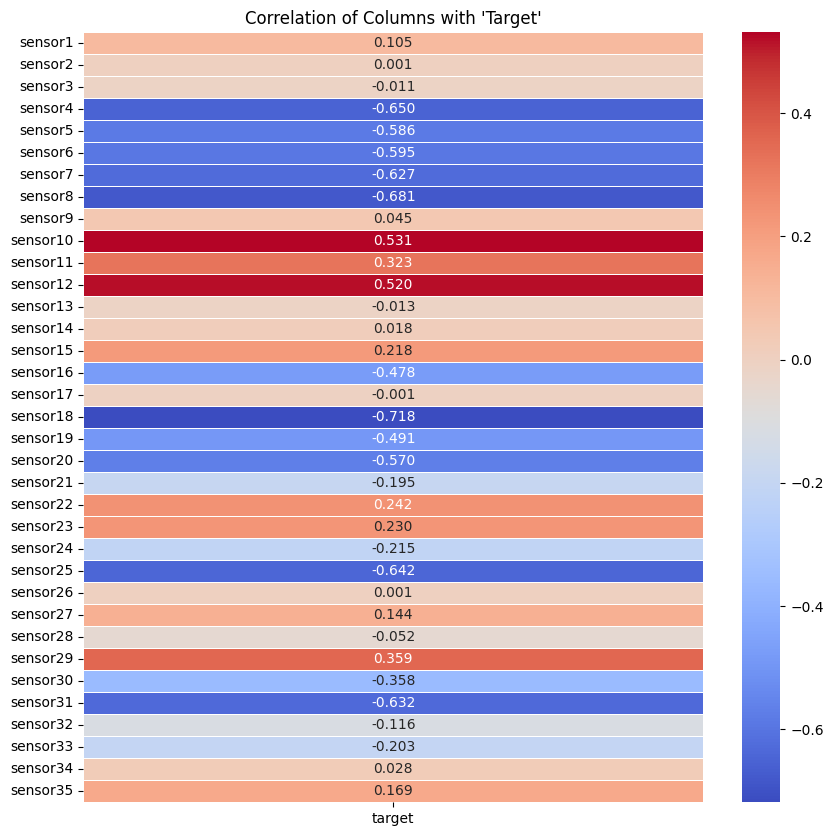

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = data.corr()
# Excluding 'f' column correlation with itself
target_corr = correlation_matrix['target'].drop('target')

sns.heatmap(target_corr.to_frame(), annot=True,
            linewidths=0.5, cmap='coolwarm', fmt='.3f', ax=ax)
plt.title("Correlation of Columns with 'Target'")
plt.show()
